In [157]:
import random
import numpy as np
import pandas as pd

ARRIVAL = .99
SERVICE = 1

SIM_TIME = 5000

random.seed(42)

u_Id = 0
users = 0

In [158]:
columns = ['event', 'time', 'u_Id', 'type',
           'queue', 'arr cust', 'depar cust', "in line"]

In [159]:
# Client

class Client:
    def __init__(self, u_Id, type, arrival_time) -> None:
        self.u_Id = u_Id
        self.type = type
        self.arrival_time = arrival_time

    def getType(self):
        return self.type

    def getArrivalTime(self):
        return self.arrival_time

    def getId(self):
        return self.u_Id

In [160]:
def arrival(time, FES, queue):
    global users
    global u_Id
    # print("ARRIVAL at time: \t{}".format(time))
    # create a record for the client
    client = Client(u_Id, 0, time)
    u_Id += 1
    # sample time until next event
    inter_arrival = random.expovariate(ARRIVAL)
    # schedule next arrival
    FES.append((time + inter_arrival, client.getId() + 1, "arrival"))
    # update state variables
    users += 1
    # print("new CLIENT [{}] created of type [{}] at time [{}]".format(client.getId(), client.getType(), client.getArrivalTime()))
    # insert record in the queue
    queue.append(client)

    # if server is idle start the service
    if users == 1:
        # sample the service time
        service_time = random.expovariate(SERVICE)

        # print("new DEPARTURE scheduled at time: {}".format(time + service_time))

        # schedule when the client will finish the server
        FES.append((time + service_time, client.getId(), "departure"))

In [161]:
def departure(time, FES, queue):
    global users
    # get the first element from the queue
    client = queue.pop(0)
    # print("CLIENT {} of type [{}] created at time [{}] departed at time [{}]".format(client.getId(), client.getType(), client.getArrivalTime(), time))
    # update state variable
    users -= 1

    # see wheather there are more clients to serve in the line
    if users > 0:
        # sample service time
        service_time = random.expovariate(SERVICE)
        # schedule when the client will finish the server
        FES.append((time + service_time, queue[0].getId(), "departure"))

In [162]:
def simulation(sim_time, _arrival, _service):
    global users
    global u_Id
    global SIM_TIME, ARRIVAL, SERVICE

    users = 0
    u_Id = 0
    SIM_TIME = sim_time
    ARRIVAL = _arrival
    SERVICE = _service

    # Future Event Set
    FES = []
    queue = []

    # simulation time
    time = 0

    # event counter
    event = 0
    arrivals = 0
    departures = 0

    # schedule the first arrival at t=0
    FES.append((time, u_Id, "arrival"))

    #create dataframe to store informations
    df = pd.DataFrame(columns=columns)

    while time < SIM_TIME:
        # sort FES in order to ave events in cronological order
        FES.sort(key=lambda x: x[0])
        (time, Id, event_type) = FES.pop(0)

        # print("users in line: \t{}".format(users))

        if event_type == "arrival":
            event += 1
            arrivals += 1
            new_df = pd.DataFrame([
                [event, float(time), Id, "arrival", len(queue), arrivals, departures, users]
            ], columns=columns)

            arrival(time, FES, queue)

        elif event_type == "departure":
            event += 1
            departures += 1
            new_df = pd.DataFrame([
                [event, float(time), Id, "departure", len(queue), arrivals, departures, users]
            ], columns=columns)

            departure(time, FES, queue)

        else:
            print("ERROR!!")
            break

        df = pd.concat([df, new_df])
        delays = df.groupby("u_Id")["time"].diff()[df.groupby("u_Id")["time"].diff().notnull()].tolist()
        # print()

    return df, delays, sum(delays)/len(delays)


In [163]:
#means = []
#for i in range(50):
#    _, _, mean = simulation(SIM_TIME, ARRIVAL, SERVICE)
#    means.append(mean)

In [164]:
df, delays, mean = simulation(SIM_TIME, 0.1, SERVICE)
df1, delays1, mean = simulation(SIM_TIME, 0.5, SERVICE)
df2, delays2, mean = simulation(SIM_TIME, 0.99, SERVICE)


In [165]:
df3, delays3, mean = simulation(SIM_TIME, 0.999, SERVICE)

In [166]:
df4, delays4, mean = simulation(SIM_TIME, 0.99999, SERVICE)

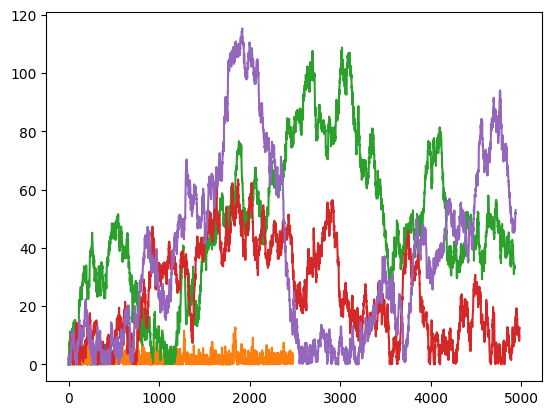

In [167]:
import matplotlib.pyplot as plt

plt.plot(delays)
plt.plot(delays1)
plt.plot(delays2)
plt.plot(delays3)
plt.plot(delays4)

In [200]:
def block_average(df, n, plot=False):
    # delays = df.groupby("u_Id")["time"].diff()[df.groupby("u_Id")["time"].diff().notnull()]
    delays = df["in line"]
    means = delays.groupby(np.arange(len(delays)) // n).mean()

    if plot:
        plt.plot(means)
        plt.show()

    return means

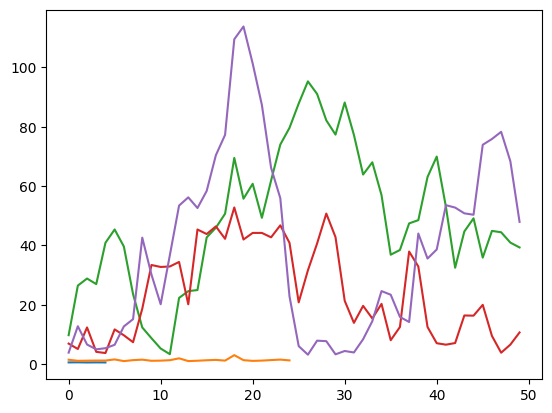

In [201]:
n = 200
plt.plot(block_average(df, n))
plt.plot(block_average(df1, n))
plt.plot(block_average(df2, n))
plt.plot(block_average(df3, n))
plt.plot(block_average(df4, n))

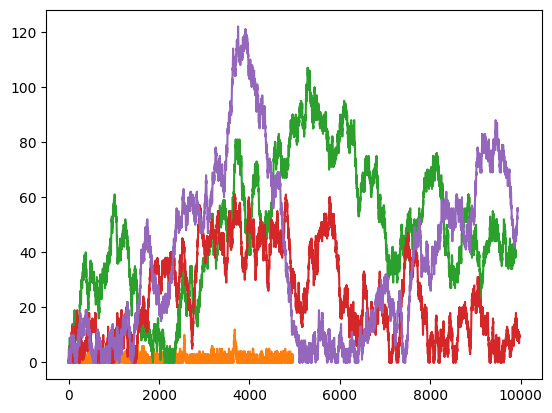

In [199]:
plt.plot(df["in line"].values)
plt.plot(df1["in line"].values)
plt.plot(df2["in line"].values)
plt.plot(df3["in line"].values)
plt.plot(df4["in line"].values)


In [207]:
def cum_mean(arr):
    cum_sum = np.cumsum(arr, axis=0)
    for i in range(cum_sum.shape[0]):
        if i == 0:
            continue
        #print(cum_sum[i] / (i + 1))
        cum_sum[i] =  cum_sum[i] / (i + 1)
    print(len(cum_sum))
    return cum_sum

471
2478
4926
4982
4939


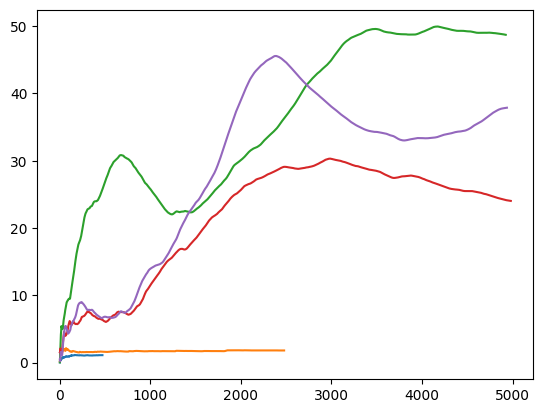

In [208]:
plt.plot(cum_mean(delays))
plt.plot(cum_mean(delays1))
plt.plot(cum_mean(delays2))
plt.plot(cum_mean(delays3))
plt.plot(cum_mean(delays4))

943
4957
9892
9975
9933


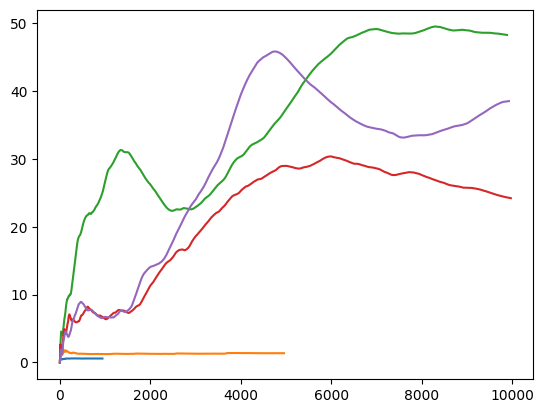

In [212]:
plt.plot(cum_mean(df["in line"].values))
plt.plot(cum_mean(df1["in line"].values))
plt.plot(cum_mean(df2["in line"].values))
plt.plot(cum_mean(df3["in line"].values))
plt.plot(cum_mean(df4["in line"].values))